In [4]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae1 import *
from KDEs import *
from toolbox import *
import warnings
import itertools
import os
warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
brr = np.array(data.return_brr)
btc = np.array(data.return_btc)

kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

In [75]:
C1 = Gaussian(dict(rho=0.9), Law_RS=kde_brr, Law_RF=kde_btc) # fix the maringals!
C2  = t_Copula(dict(rho=0.1, nu=4), Law_RS=kde_brr, Law_RF=kde_btc, nu_lowerbound=2) 

In [193]:
train_size = 300
test_size = 30
train_rho_arr = []
test_rho_arr  = []
train_nu_arr  = []
test_nu_arr   = []
best_h_arr_train = []
best_h_arr_test  = []

step_size = 30
steps = 10

for i in range(steps):
    test_start = (i)*step_size
    test_end = (i+1)*step_size

    train_start = test_end 
    train_end   = test_end + train_size

    brr_train = brr[train_start:train_end]
    brr_test  = brr[test_start:test_end]
    u_train = ECDF(brr_train)(brr_train)
    u_test = ECDF(brr_test)(brr_test)

    btc_train = btc[train_start:train_end]
    btc_test  = btc[test_start:test_end]
    v_train = ECDF(btc_train)(btc_train)
    v_test = ECDF(btc_test)(btc_test)

#     C1.canonical_calibrate(u_train, v_train)
#     train_rho_arr.append(C1.rho)

#     C1.canonical_calibrate(u_test, v_test)
#     test_rho_arr.append(C1.rho)

    C2.Law_RS = KDE(brr_train, 'Gaussian')
    C2.Law_RF = KDE(btc_train, 'Gaussian')
    C2.canonical_calibrate(u_train, v_train)
    train_rho_arr.append(C2.rho)
    train_nu_arr.append(C2.nu)
    best_h_arr_train.append(optimize_h(C2, [10], [])[1])
    
    
    C2.Law_RS = KDE(brr_test, 'Gaussian')
    C2.Law_RF = KDE(btc_test, 'Gaussian')
    C2.canonical_calibrate(u_test, v_test)
    test_rho_arr.append(C2.rho)
    test_nu_arr.append(C2.nu)
    best_h_arr_test.append(optimize_h(C2, [10], [])[1])

# print(test_start, test_end, train_start, train_end)

Optimization terminated successfully.
         Current function value: -0.487272
         Iterations: 61
         Function evaluations: 134
Optimization terminated successfully.
         Current function value: 0.001448
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.057460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: -0.623182
         Iterations: 82
         Function evaluations: 178
Optimization terminated successfully.
         Current function value: 0.000304
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.025343
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -0.492752
         Iterations: 82
         Function evaluations: 172
Optimization terminated succ

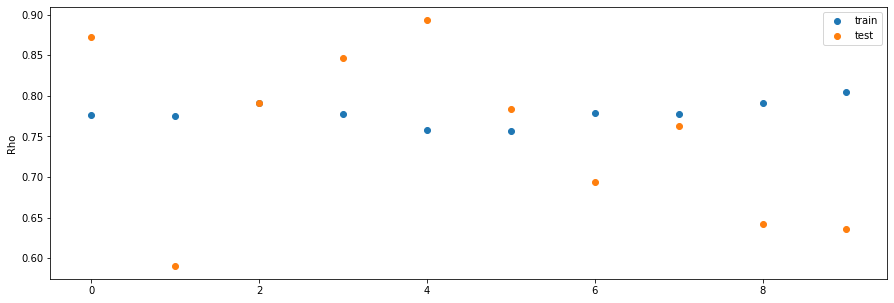

In [135]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(train_rho_arr)), train_rho_arr, label='train')
plt.scatter(range(len(train_rho_arr)), test_rho_arr, label='test')
plt.ylabel("Rho")
plt.legend()

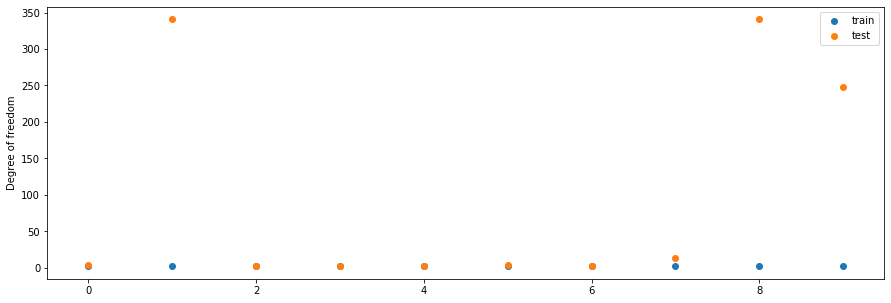

In [136]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(train_rho_arr)), train_nu_arr, label='train')
plt.scatter(range(len(train_rho_arr)), test_nu_arr, label='test')
plt.ylabel("Degree of freedom")
plt.legend()

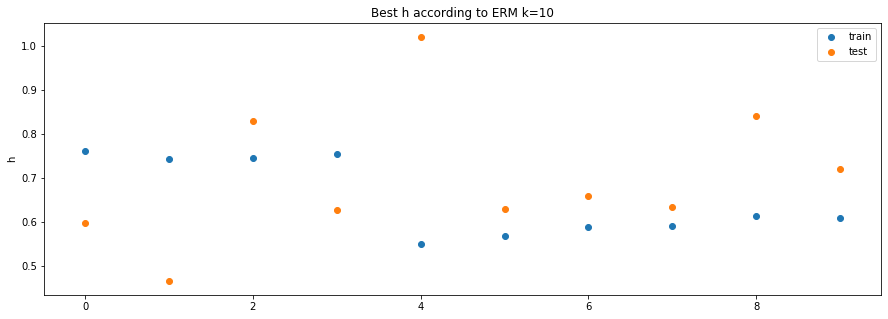

In [137]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(train_rho_arr)), best_h_arr_train, label='train')
plt.scatter(range(len(train_rho_arr)), best_h_arr_test, label='test')
plt.ylabel("h")
plt.title('Best h according to ERM k=10')
plt.legend()

-0.0014910797908646504 -0.0010391048572268426
0.05482823892427337 0.03960317405421936


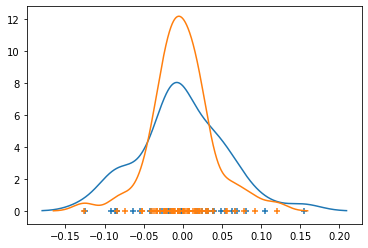

In [106]:
i=2
test_start = (i)*test_size
test_end = (i+1)*test_size

train_start = (i)*train_size + test_size
train_end   = (i+1)*train_size + test_size

brr_train = brr[train_start:train_end]
brr_test  = brr[test_start:test_end]

kde = KDE(btc_train, 'Gaussian')
kde.plot_density()
kde = KDE(btc_test, 'Gaussian')
kde.plot_density()
print(np.mean(btc_train), np.mean(btc_test))
print(np.std(btc_train), np.std(btc_test))

-0.005658812511065621 -0.004071727755581553
0.041245617422854125 0.051323585695541844


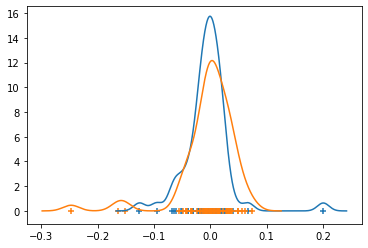

In [105]:
kde = KDE(brr_train, 'Gaussian')
kde.plot_density()
kde = KDE(brr_test, 'Gaussian')
kde.plot_density()
print(np.mean(brr_train), np.mean(brr_test))
print(np.std(brr_train), np.std(brr_test))

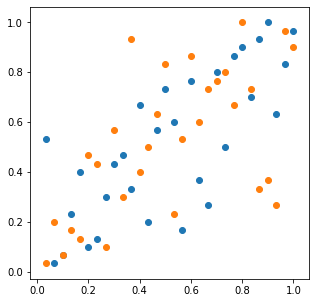

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(u_train, v_train)
plt.scatter(u_test, v_test)

In [138]:
train_size = 60
test_size = 60
train_rho_arr = []
test_rho_arr  = []
train_nu_arr  = []
test_nu_arr   = []
best_h_arr_train = []
best_h_arr_test  = []

step_size = 60
steps = 10

for i in range(steps):
    test_start = (i)*step_size
    test_end = (i+1)*step_size

    train_start = test_end 
    train_end   = test_end + train_size

    brr_train = brr[train_start:train_end]
    brr_test  = brr[test_start:test_end]
    u_train = ECDF(brr_train)(brr_train)
    u_test = ECDF(brr_test)(brr_test)

    btc_train = btc[train_start:train_end]
    btc_test  = btc[test_start:test_end]
    v_train = ECDF(btc_train)(btc_train)
    v_test = ECDF(btc_test)(btc_test)

#     C1.canonical_calibrate(u_train, v_train)
#     train_rho_arr.append(C1.rho)

#     C1.canonical_calibrate(u_test, v_test)
#     test_rho_arr.append(C1.rho)

    C2.Law_RS = KDE(brr_train, 'Gaussian')
    C2.Law_RF = KDE(btc_train, 'Gaussian')
    C2.canonical_calibrate(u_train, v_train)
    train_rho_arr.append(C2.rho)
    train_nu_arr.append(C2.nu)
    best_h_arr_train.append(optimize_h(C2, [10], [])[1])
    
    
    C2.Law_RS = KDE(brr_test, 'Gaussian')
    C2.Law_RF = KDE(btc_test, 'Gaussian')
    C2.canonical_calibrate(u_test, v_test)
    test_rho_arr.append(C2.rho)
    test_nu_arr.append(C2.nu)
    best_h_arr_test.append(optimize_h(C2, [10], [])[1])

# print(test_start, test_end, train_start, train_end)

Optimization terminated successfully.
         Current function value: -0.515669
         Iterations: 157
         Function evaluations: 307
Optimization terminated successfully.
         Current function value: 0.001180
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.050843
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -0.427109
         Iterations: 122
         Function evaluations: 259
Optimization terminated successfully.
         Current function value: 0.000156
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.018589
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -0.599543
         Iterations: 110
         Function evaluations: 224
Optimization terminated s

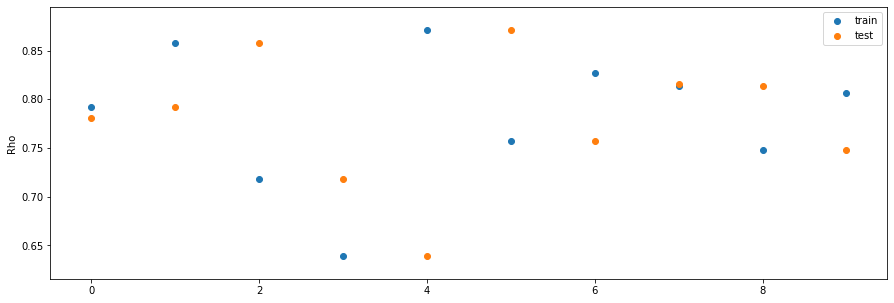

In [139]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(train_rho_arr)), train_rho_arr, label='train')
plt.scatter(range(len(train_rho_arr)), test_rho_arr, label='test')
plt.ylabel("Rho")
plt.legend()

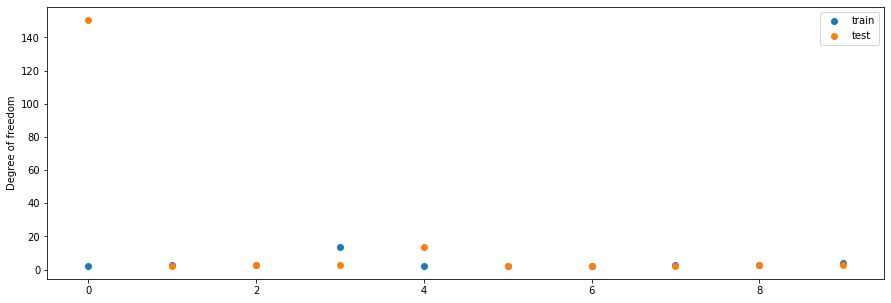

In [140]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(train_rho_arr)), train_nu_arr, label='train')
plt.scatter(range(len(train_rho_arr)), test_nu_arr, label='test')
plt.ylabel("Degree of freedom")
plt.legend()

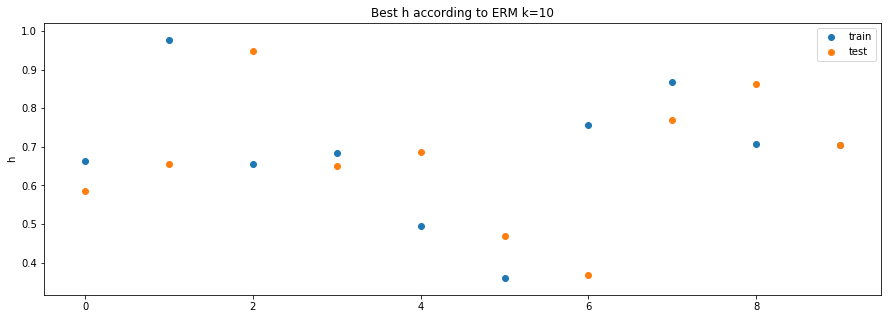

In [141]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(train_rho_arr)), best_h_arr_train, label='train')
plt.scatter(range(len(train_rho_arr)), best_h_arr_test, label='test')
plt.ylabel("h")
plt.title('Best h according to ERM k=10')
plt.legend()

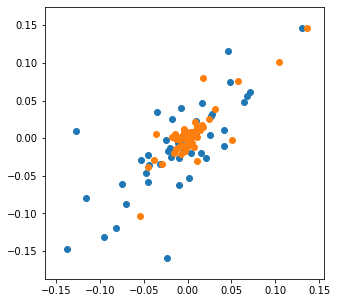

In [187]:
i=6
test_start = (i)*step_size
test_end = (i+1)*step_size

train_start = test_end 
train_end   = test_end + train_size

brr_train = brr[train_start:train_end]
brr_test  = brr[test_start:test_end]
u_train = ECDF(brr_train)(brr_train)
u_test = ECDF(brr_test)(brr_test)

btc_train = btc[train_start:train_end]
btc_test  = btc[test_start:test_end]
v_train = ECDF(btc_train)(btc_train)
v_test = ECDF(btc_test)(btc_test)

plt.figure(figsize=(5,5))
plt.scatter(brr_train, btc_train)
plt.scatter(brr_test, btc_test)

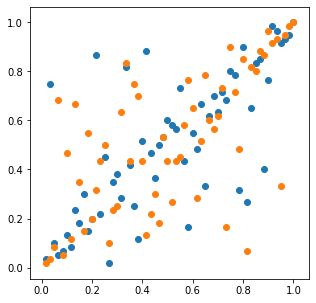

In [188]:
plt.figure(figsize=(5,5))
plt.scatter(u_train, v_train)
plt.scatter(u_test, v_test)

In [210]:
def hedging_effectiveness(h_arr, spot, future, k_arr, q_arr):
    results = np.ones((len(h_arr),1+len(k_arr)+len(q_arr)))
    for i, h in enumerate(h_arr):
        rh = spot-h*future
        results[i,:]=1-risk_measures(k_arr, q_arr, rh)/risk_measures(k_arr, q_arr, spot)
    return results

In [217]:
def hedging_effectiveness(h_arr, spot, future, k_arr, q_arr):
    results = np.ones((len(h_arr),1+len(k_arr)+len(q_arr)))
    for i, h in enumerate(h_arr):
        rh = spot-h*future
        results[i,:]=1-risk_measures(k_arr, q_arr, rh)/risk_measures(k_arr, q_arr, spot)
    return results

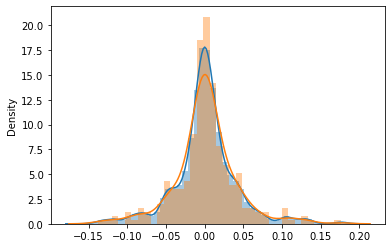

In [248]:
sns.distplot(a)
sns.distplot(brr_train)


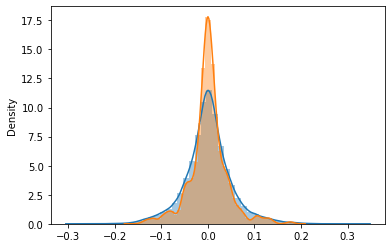

In [251]:
sns.distplot(a-h*b)
sns.distplot(a)

In [263]:
best_h_arr_train[-5:]

[0.5794921874999996,
 0.5842773437499996,
 0.6021484374999997,
 0.6087890624999996,
 0.6273437499999996]

In [250]:
h = best_h_arr_train[-1]
k_arr = [10, 20]
q_arr = [0.01, 0.1]
risk_measures(k_arr, q_arr, a-h*b)/risk_measures(k_arr, q_arr, a)

array([1.53664668, 1.25359352, 1.22005369, 1.51371966, 2.09740482])

In [261]:
C2.Law_RS = stats.uniform
C2.Law_RF = stats.uniform
s = C2.sample(100000)
a = KDE(brr_train, 'Gaussian').ppf(s[:,0])
b = KDE(brr_train, 'Gaussian').ppf(s[:,1])

In [262]:
HE = hedging_effectiveness(best_h_arr_train[-5:], a, b ,[10, 20],[0.01, 0.1])
HE

array([[0.39560312, 0.21994434, 0.2287803 , 0.22923309, 0.42002853],
       [0.39600932, 0.22020351, 0.22927568, 0.22843726, 0.42784811],
       [0.39711212, 0.22088849, 0.2308499 , 0.22465302, 0.45416765],
       [0.39735536, 0.22102869, 0.23132267, 0.22386061, 0.46357859],
       [0.39755672, 0.22109035, 0.23231729, 0.22060382, 0.49391826]])

In [264]:
HE = hedging_effectiveness(best_h_arr_train[-5:],
                           brr_train,
                           btc_train ,
                           [10, 20],[0.01, 0.1])
HE

array([[0.63940345, 0.41177619, 0.42912858, 0.45229731, 1.26354082],
       [0.6408542 , 0.41311648, 0.4304645 , 0.45344227, 1.26073593],
       [0.64571776, 0.41769547, 0.43489606, 0.47691043, 1.25026053],
       [0.64730206, 0.41920502, 0.43626149, 0.47791495, 1.24636804],
       [0.6510885 , 0.42288464, 0.43930599, 0.48049677, 1.23549194]])

In [230]:
[a[i,i] for i in range(a.shape[0])]

[0.3602234632266418,
 0.26344623448894433,
 0.2699050115895347,
 0.09722429651885289,
 0.8872123833119844]

In [206]:
h = best_h_arr_train[i]
rs = brr_train
rf = btc_train 
rh = rs - h*rf
1- risk_measures([10], [], rh)/risk_measures([10], [], rs)

array([0.6510885 , 0.42288464])

0.42687943304138165
0.26298240402819284
0.4282094536146237
0.26344623448894433
0.428003843286081
0.26337758972186887
0.4294397697458868
0.26381325052361526
0.4066300945303757
0.2491948009257069
0.4117761891081153
0.25385607711341374
0.41311647638771176
0.25515026581900024
0.41769546689593695
0.2591558321304327
0.4192050233774369
0.26034382971013625
0.42288464493073785
0.26160010072817086


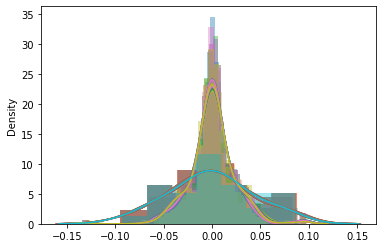

In [233]:
for i in range(10):
    h = best_h_arr_train[i]
    rs = brr_train
    rf = btc_train 
    rh = rs - h*rf
    sns.distplot(rh)
    print(1- ERM_estimate_trapezoidal(10,rh)/ERM_estimate_trapezoidal(10,rs))

    h = best_h_arr_train[i]
    rs = brr_test
    rf = btc_test 
    rh = rs - h*rf
    sns.distplot(rh)
    print(1- ERM_estimate_trapezoidal(10,rh)/ERM_estimate_trapezoidal(10,rs))

0.2743256301360164
0.2869492712755749


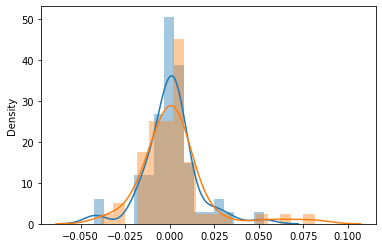

In [190]:
h = best_h_arr_train[i]
rs = brr_test
rf = btc_test
rh = rs - h*rf
sns.distplot(rh)
print(1- ERM_estimate_trapezoidal(10,rh)/ERM_estimate_trapezoidal(10,rs))

h = best_h_arr_test[i]
rs = brr_test
rf = btc_test 
rh = rs - h*rf
sns.distplot(rh)
print(1- ERM_estimate_trapezoidal(10,rh)/ERM_estimate_trapezoidal(10,rs))

0.2743256301360164
0.2869492712755749


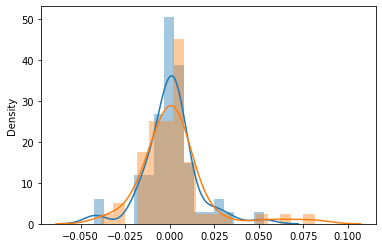

In [191]:
h = best_h_arr_train[i]
rs = brr_test
rf = btc_test 
rh = rs - h*rf
sns.distplot(rh)
print(1- ERM_estimate_trapezoidal(10,rh)/ERM_estimate_trapezoidal(10,rs))

h = best_h_arr_test[i]
rs = brr_test
rf = btc_test 
rh = rs - h*rf
sns.distplot(rh)
print(1- ERM_estimate_trapezoidal(10,rh)/ERM_estimate_trapezoidal(10,rs))